In [121]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
seed=7
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS


from operator import itemgetter
import matplotlib as mpl
%matplotlib inline

In [2]:
#Reading the csv file
data = pd.read_csv('data.csv',names=['C-1','C-2','C-3','C-4','C-5','C-6','C-7','C-8','C-9','C-10','C-11','C-12','C-13','C-14','C-15','C-16','C-17','C-18','C-19','C-20','C-21','C-22','C-23','C-24','C-25','C-26','C-27','C-28','C-29','C-30','C-31','C-32','C-33','C-34','C-35','C-36','C-37','C-38','C-39','C-40','C-41','C-42','C-43','C-44','C-45','C-46','C-47','C-48','C-49','C-50','C-51','C-52','C-53','C-54','C-55','C-56','C-57','C-58','C-59','C-60','target'])

In [3]:
#Listing out rows and columns in the dataset
data.shape

(208, 61)

In [98]:
#displaying first 5 rows of dataset
data.head()

,C-1,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-9,C-10,...,C-52,C-53,C-54,C-55,C-56,C-57,C-58,C-59,C-60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [99]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
C-1       208 non-null float64
C-2       208 non-null float64
C-3       208 non-null float64
C-4       208 non-null float64
C-5       208 non-null float64
C-6       208 non-null float64
C-7       208 non-null float64
C-8       208 non-null float64
C-9       208 non-null float64
C-10      208 non-null float64
C-11      208 non-null float64
C-12      208 non-null float64
C-13      208 non-null float64
C-14      208 non-null float64
C-15      208 non-null float64
C-16      208 non-null float64
C-17      208 non-null float64
C-18      208 non-null float64
C-19      208 non-null float64
C-20      208 non-null float64
C-21      208 non-null float64
C-22      208 non-null float64
C-23      208 non-null float64
C-24      208 non-null float64
C-25      208 non-null float64
C-26      208 non-null float64
C-27      208 non-null float64
C-28      208 non-null float64
C-29      208 non-null floa

In [100]:
#Number of target R and M
data.target.value_counts()

0    111
1     97
Name: target, dtype: int64

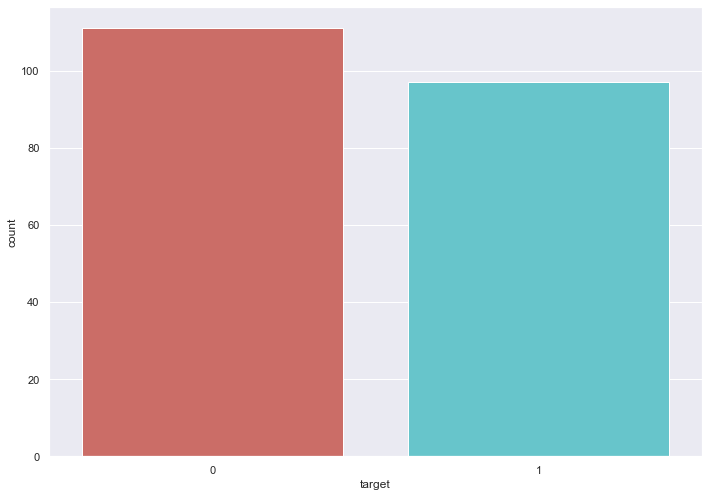

In [101]:
sns.countplot(x="target", data=data, palette="hls")
plt.show()

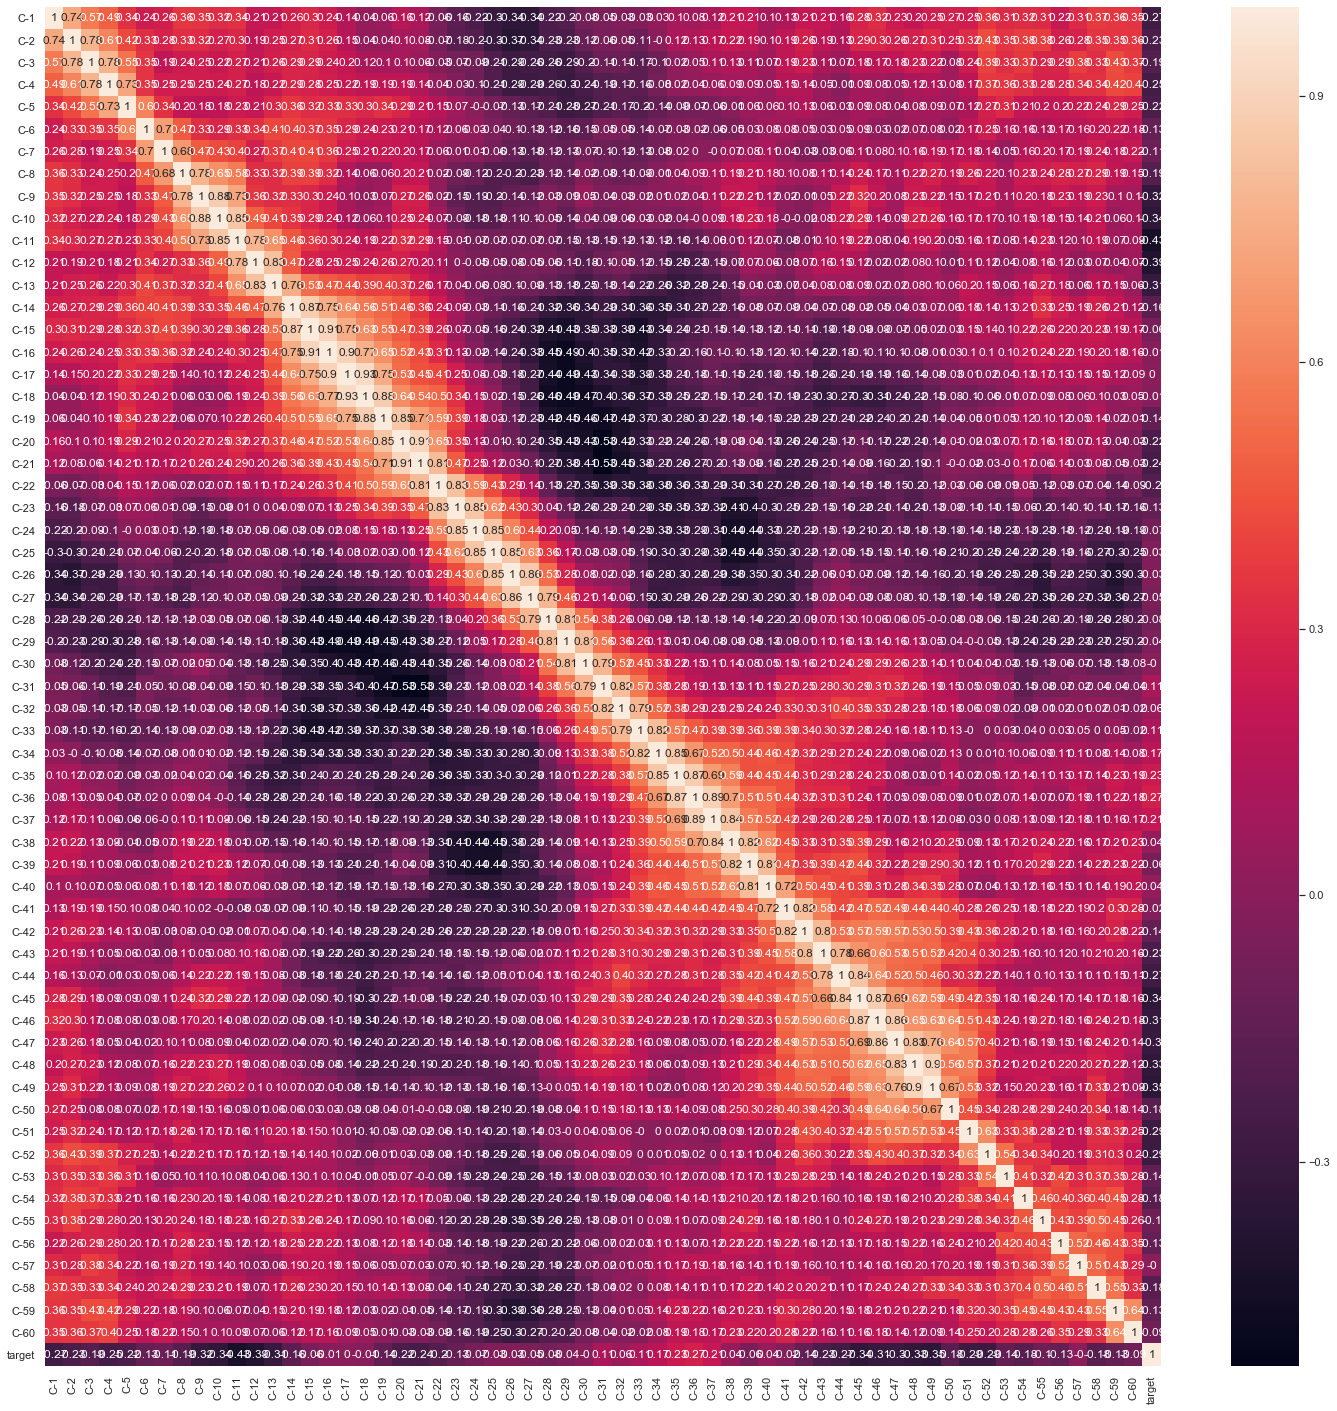

In [102]:
#dataset_final.corr()
fig, ax = plt.subplots(figsize=(25,25))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

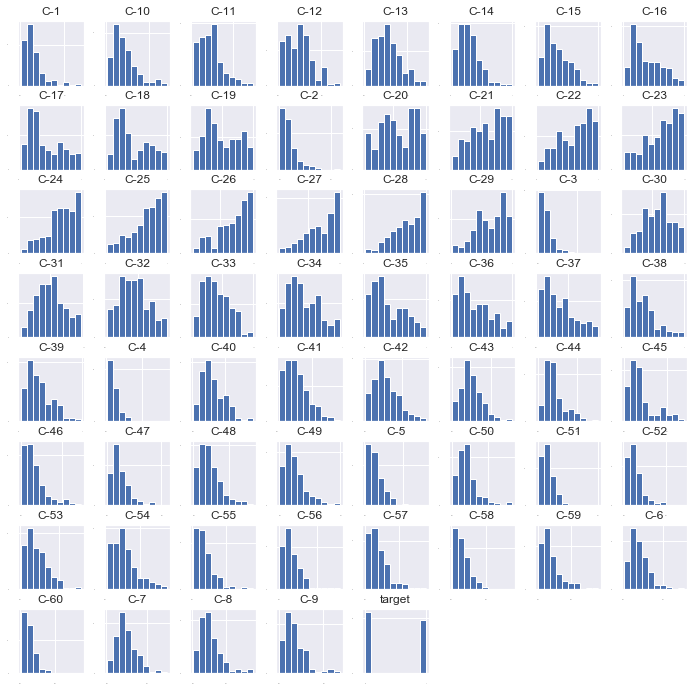

In [103]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

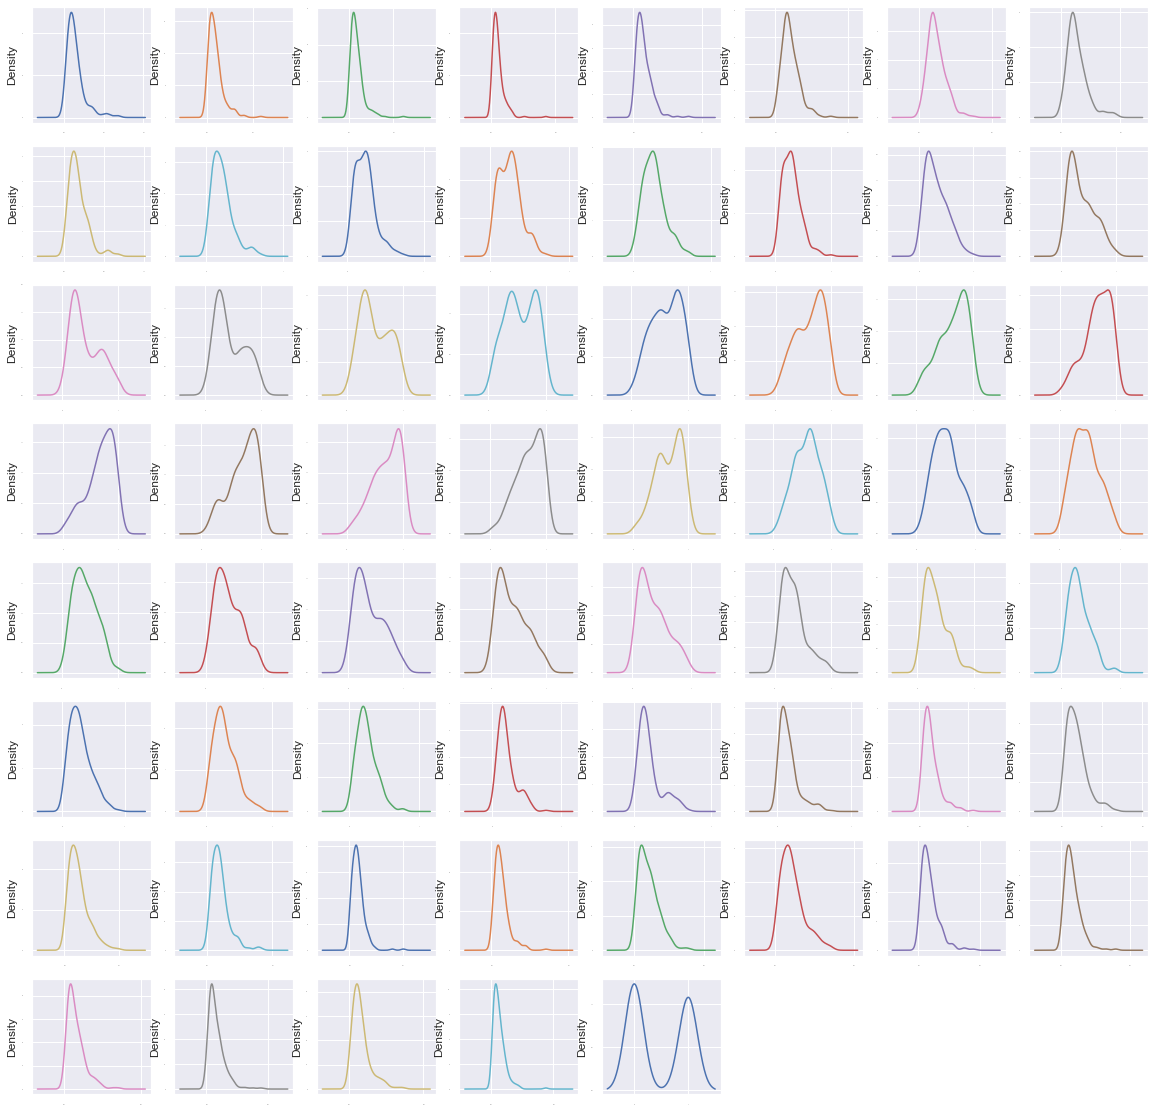

In [104]:
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(20,20))
pyplot.show()

In [105]:
#Check if there is null value in the dataset
print(data.isna().sum())

C-1       0
C-2       0
C-3       0
C-4       0
C-5       0
C-6       0
C-7       0
C-8       0
C-9       0
C-10      0
C-11      0
C-12      0
C-13      0
C-14      0
C-15      0
C-16      0
C-17      0
C-18      0
C-19      0
C-20      0
C-21      0
C-22      0
C-23      0
C-24      0
C-25      0
C-26      0
C-27      0
C-28      0
C-29      0
C-30      0
         ..
C-32      0
C-33      0
C-34      0
C-35      0
C-36      0
C-37      0
C-38      0
C-39      0
C-40      0
C-41      0
C-42      0
C-43      0
C-44      0
C-45      0
C-46      0
C-47      0
C-48      0
C-49      0
C-50      0
C-51      0
C-52      0
C-53      0
C-54      0
C-55      0
C-56      0
C-57      0
C-58      0
C-59      0
C-60      0
target    0
Length: 61, dtype: int64


In [106]:
X = data.iloc[:,:-1].values
y = data.iloc[:,60].values

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)

### Standardizing Data using Standard Scalar

In [111]:
#Splitting the dataset into test and train
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25)

In [112]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

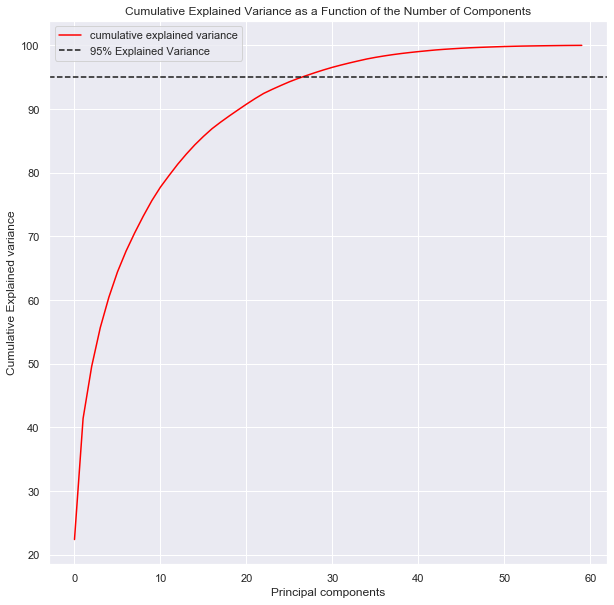

In [113]:
#Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [114]:
from sklearn.decomposition import PCA
pca = PCA(.95) 
pca.fit(X_train)

x_train_pca = pca.transform(X_train)
test_pca        = pca.transform(X_test)

In [115]:
# Spot-Check Algorithms without PCA
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('AB', AdaBoostClassifier()))
    basedModels.append(('GBM', GradientBoostingClassifier()))
    
    return basedModels

def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    SEED=7
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [116]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.755074 (0.116143)
KNN: 0.823235 (0.105500)
CART: 0.730392 (0.088183)
NB: 0.690074 (0.096504)
SVM: 0.830784 (0.087521)
RF: 0.761005 (0.132922)
AB: 0.838971 (0.066733)
GBM: 0.813505 (0.118105)


# With PCA

In [20]:
# Spot-Check Algorithms without PCA
def GetBasedModel_pca():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('AB', AdaBoostClassifier()))
    basedModels.append(('GBM', GradientBoostingClassifier()))
    
    return basedModels

def BasedLine2_pca(X_train, y_train,models):
    # Test options and evaluation metric
    SEED=7
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results
class PlotBoxR_pca(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult_pca(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [21]:
models = GetBasedModel_pca()
names,results = BasedLine2_pca(x_train_pca, y_train,models)
PlotBoxR_pca().PlotResult_pca(names,results)

LR: 0.762500 (0.093234)
KNN: 0.765179 (0.097403)
CART: 0.758036 (0.111978)
NB: 0.676786 (0.146863)
SVM: 0.833929 (0.080178)
RF: 0.736607 (0.086589)
AB: 0.719643 (0.106261)
GBM: 0.750893 (0.121995)


### KNN CLASSIFIER without PCA

In [22]:
accuracy_val = [] #to store accuracy values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p = 2)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    accuracy_val.append(accuracy) #store rmse values
    print('Accuracy value for k= ' , K , 'is:',accuracy)

Accuracy value for k=  1 is: 0.8461538461538461
Accuracy value for k=  2 is: 0.75
Accuracy value for k=  3 is: 0.7884615384615384
Accuracy value for k=  4 is: 0.7115384615384616
Accuracy value for k=  5 is: 0.7307692307692307
Accuracy value for k=  6 is: 0.6730769230769231
Accuracy value for k=  7 is: 0.7115384615384616
Accuracy value for k=  8 is: 0.6538461538461539
Accuracy value for k=  9 is: 0.7115384615384616
Accuracy value for k=  10 is: 0.6346153846153846
Accuracy value for k=  11 is: 0.6923076923076923
Accuracy value for k=  12 is: 0.6346153846153846
Accuracy value for k=  13 is: 0.6923076923076923
Accuracy value for k=  14 is: 0.6538461538461539
Accuracy value for k=  15 is: 0.6730769230769231
Accuracy value for k=  16 is: 0.6730769230769231
Accuracy value for k=  17 is: 0.6538461538461539
Accuracy value for k=  18 is: 0.6538461538461539
Accuracy value for k=  19 is: 0.6923076923076923
Accuracy value for k=  20 is: 0.6730769230769231


In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",knn_cr)

Classification Report:
               precision    recall  f1-score   support

           M       0.58      0.96      0.72        23
           R       0.93      0.45      0.60        29

    accuracy                           0.67        52
   macro avg       0.75      0.70      0.66        52
weighted avg       0.77      0.67      0.66        52



In [24]:
from sklearn import metrics
print("Accuracy for KNN Regressor is :",metrics.accuracy_score(y_test, y_pred))

Accuracy for KNN Regressor is : 0.6730769230769231


# KNN CLASSIFIER with PCA

In [25]:
accuracy_val = [] #to store accuracy values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p = 2)

    model.fit(x_train_pca, y_train)  #fit the model
    y_pred=model.predict(test_pca) #make prediction on test set
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    accuracy_val.append(accuracy) #store rmse values
    print('Accuracy value for k= ' , K , 'is:',accuracy)

Accuracy value for k=  1 is: 0.8269230769230769
Accuracy value for k=  2 is: 0.7692307692307693
Accuracy value for k=  3 is: 0.8461538461538461
Accuracy value for k=  4 is: 0.7307692307692307
Accuracy value for k=  5 is: 0.7884615384615384
Accuracy value for k=  6 is: 0.6923076923076923
Accuracy value for k=  7 is: 0.6923076923076923
Accuracy value for k=  8 is: 0.6923076923076923
Accuracy value for k=  9 is: 0.7115384615384616
Accuracy value for k=  10 is: 0.6730769230769231
Accuracy value for k=  11 is: 0.7115384615384616
Accuracy value for k=  12 is: 0.6730769230769231
Accuracy value for k=  13 is: 0.6923076923076923
Accuracy value for k=  14 is: 0.6346153846153846
Accuracy value for k=  15 is: 0.6730769230769231
Accuracy value for k=  16 is: 0.6730769230769231
Accuracy value for k=  17 is: 0.6730769230769231
Accuracy value for k=  18 is: 0.6153846153846154
Accuracy value for k=  19 is: 0.6346153846153846
Accuracy value for k=  20 is: 0.6346153846153846


In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",knn_cr)

Classification Report:
               precision    recall  f1-score   support

           M       0.55      0.91      0.69        23
           R       0.86      0.41      0.56        29

    accuracy                           0.63        52
   macro avg       0.70      0.66      0.62        52
weighted avg       0.72      0.63      0.62        52



In [27]:
from sklearn import metrics
print("Accuracy for KNN Regressor is :",metrics.accuracy_score(y_test, y_pred))

Accuracy for KNN Regressor is : 0.6346153846153846


### SVM CLASSIFIER without PCA

In [117]:
from sklearn import svm
c = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c, kernel=kernel)
model = SVC()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.858974 using {'C': 2.0, 'kernel': 'rbf'}


In [119]:
y_pred = grid_result.predict(X_test)
svm_cr=classification_report(y_test,y_pred)
svm_ac=accuracy_score(y_test,y_pred)
print("Classification Report:\n",svm_cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.90      0.78      0.84        23

    accuracy                           0.87        52
   macro avg       0.87      0.86      0.86        52
weighted avg       0.87      0.87      0.86        52



In [30]:
from sklearn import metrics
print("Accuracy for svm classifier is:",metrics.accuracy_score(y_test, y_pred))

Accuracy for svm classifier is: 0.8076923076923077


# SVM CLASSIFIER with PCA

In [31]:
from sklearn import svm
c = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c, kernel=kernel)
model = SVC()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(x_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.833333 using {'C': 1.7, 'kernel': 'rbf'}


In [32]:
y_pred = grid_result.predict(test_pca)
svm_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",svm_cr)

Classification Report:
               precision    recall  f1-score   support

           M       0.75      0.91      0.82        23
           R       0.92      0.76      0.83        29

    accuracy                           0.83        52
   macro avg       0.83      0.84      0.83        52
weighted avg       0.84      0.83      0.83        52



In [33]:
from sklearn import metrics
print("Accuracy for svm classifier is:",metrics.accuracy_score(y_test, y_pred))

Accuracy for svm classifier is: 0.8269230769230769


### Decision Tree Classifier without PCA

In [34]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
#n_components = list(range(1,X.shape[1]+1,1))
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12,15,18,20,22]
sample_split_range=list(range(2, 50))
max_features=[1, 2, 3, 4,5,6,7,8,9,10,12,14,16,18,20,22,24,30]

parameters = dict(
                  criterion=criterion,
                  max_depth=max_depth,
                  max_features=max_features,
                  min_samples_split=sample_split_range)


model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=seed)
Decision_tree =GridSearchCV(model, parameters,cv = kfold)
grid_result = Decision_tree.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.801282 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 8, 'min_samples_split': 6}


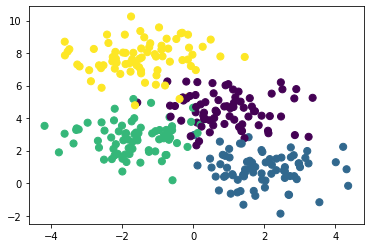

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

In [36]:
from sklearn.metrics import accuracy_score
y_pred =grid_result.predict(X_test)
dt_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",dt_cr)
dt_ac=accuracy_score(y_test, y_pred)
print("Accuracy Score for Decision Tree Classifier is",dt_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.67      0.87      0.75        23
           R       0.86      0.66      0.75        29

    accuracy                           0.75        52
   macro avg       0.77      0.76      0.75        52
weighted avg       0.78      0.75      0.75        52

Accuracy Score for Decision Tree Classifier is 0.75


# Decision Tree Classifier with PCA

In [37]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
#n_components = list(range(1,X.shape[1]+1,1))
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12,15,18,20,22]
sample_split_range=list(range(2, 50))
#max_features=[1, 2, 3, 4,5,6,7,8,9,10,12,14,16,18,20,22,24,30]

parameters = dict(
                  criterion=criterion,
                  max_depth=max_depth,
                
                  min_samples_split=sample_split_range)


model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=seed)
Decision_tree =GridSearchCV(model, parameters,cv = kfold)
grid_result = Decision_tree.fit(x_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.750000 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5}


In [38]:
from sklearn.metrics import accuracy_score
y_pred =grid_result.predict(test_pca)
dt_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",dt_cr)
dt_ac=accuracy_score(y_test, y_pred)
print("Accuracy Score for Decision Tree Classifier is",dt_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.61      0.83      0.70        23
           R       0.81      0.59      0.68        29

    accuracy                           0.69        52
   macro avg       0.71      0.71      0.69        52
weighted avg       0.72      0.69      0.69        52

Accuracy Score for Decision Tree Classifier is 0.6923076923076923


### Naive Bayes Classifier without PCA

In [39]:
from sklearn.naive_bayes import MultinomialNB

skf = StratifiedKFold(n_splits=10)
params = {}
nb =  GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params,return_train_score=True)
gs.fit(X_train, y_train)
print("Best: %f using %s" % (gs.best_score_, grid_result.best_params_))

Best: 0.666667 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5}


In [40]:
y_pred= gs.predict(X_test)
nb_ac= accuracy_score(y_test, y_pred)

In [41]:
nb_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",nb_cr)
print("Accuracy Score for Naive Bayes Classifier is",nb_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.71      0.52      0.60        23
           R       0.69      0.83      0.75        29

    accuracy                           0.69        52
   macro avg       0.70      0.67      0.68        52
weighted avg       0.69      0.69      0.68        52

Accuracy Score for Naive Bayes Classifier is 0.6923076923076923


### Naive Bayes Classifier with PCA

In [42]:
from sklearn.naive_bayes import MultinomialNB

skf = StratifiedKFold(n_splits=10)
params = {}
nb =  GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params,return_train_score=True)
gs.fit(x_train_pca, y_train)
print("Best: %f using %s" % (gs.best_score_, grid_result.best_params_))

Best: 0.679487 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5}


In [43]:
y_pred= gs.predict(test_pca)
nb_ac= accuracy_score(y_test, y_pred)

In [44]:
nb_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",nb_cr)
print("Accuracy Score for Naive Bayes Classifier is",nb_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.58      0.83      0.68        23
           R       0.79      0.52      0.62        29

    accuracy                           0.65        52
   macro avg       0.68      0.67      0.65        52
weighted avg       0.69      0.65      0.65        52

Accuracy Score for Naive Bayes Classifier is 0.6538461538461539


### Random Forest Classifier without PCA

In [45]:
from sklearn.ensemble import RandomForestClassifier
# rnd_clf = RandomForestClassifier(n_estimators=10, random_state=seed)
# rnd_clf.fit(X_train, y_train)

n_estimators= [100, 500]
max_features= ['auto', 'sqrt', 'log2']
max_depth= [4,5,6,7,8]
criterion=['gini', 'entropy']

param_grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
kfold = KFold(n_splits=10, random_state=seed)
model_rfc=RandomForestClassifier(random_state=seed)
CV_rfc = GridSearchCV(model_rfc,param_grid,cv=kfold)
CV_rfc.fit(X_train, y_train)
print("Best: %f using %s" % (CV_rfc.best_score_, CV_rfc.best_params_))

Best: 0.820513 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [46]:
from sklearn.metrics import accuracy_score
y_pred = CV_rfc.predict(X_test)
rf_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",rf_cr)
rf_ac= accuracy_score(y_test, y_pred)
print("Accuracy Score for Random forest Classifier is", rf_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.68      1.00      0.81        23
           R       1.00      0.62      0.77        29

    accuracy                           0.79        52
   macro avg       0.84      0.81      0.79        52
weighted avg       0.86      0.79      0.78        52

Accuracy Score for Random forest Classifier is 0.7884615384615384


### Random Forest Classifier with PCA

In [47]:
from sklearn.ensemble import RandomForestClassifier
# rnd_clf = RandomForestClassifier(n_estimators=10, random_state=seed)
# rnd_clf.fit(X_train, y_train)

n_estimators= [100, 500]
max_features= ['auto', 'sqrt', 'log2']
max_depth= [4,5,6,7,8]
criterion=['gini', 'entropy']

param_grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
kfold = KFold(n_splits=10, random_state=seed)
model_rfc=RandomForestClassifier(random_state=seed)
CV_rfc = GridSearchCV(model_rfc,param_grid,cv=kfold)
CV_rfc.fit(x_train_pca, y_train)
print("Best: %f using %s" % (CV_rfc.best_score_, CV_rfc.best_params_))

Best: 0.814103 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [48]:
from sklearn.metrics import accuracy_score
y_pred = CV_rfc.predict(test_pca)
rf_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",rf_cr)
rf_ac= accuracy_score(y_test, y_pred)
print("Accuracy Score for Random forest Classifier is", rf_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.64      0.91      0.75        23
           R       0.89      0.59      0.71        29

    accuracy                           0.73        52
   macro avg       0.77      0.75      0.73        52
weighted avg       0.78      0.73      0.73        52

Accuracy Score for Random forest Classifier is 0.7307692307692307


### Logistic Regression without cross validation

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = [1,3,4]
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
LR_RandSearch = GridSearchCV(model,hyperparameters)
clf = LR_RandSearch.fit(X_train, y_train)
y_pred= clf.predict(X_test) 
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

Best: 0.782051 using {'C': 1, 'penalty': 'l2'}


In [50]:
lg_cr=classification_report(y_test,y_pred)
print("Classification Report:\n",lg_cr)
lg_ac= accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic Regression Classifier is", lg_ac)

Classification Report:
               precision    recall  f1-score   support

           M       0.69      0.87      0.77        23
           R       0.87      0.69      0.77        29

    accuracy                           0.77        52
   macro avg       0.78      0.78      0.77        52
weighted avg       0.79      0.77      0.77        52

Accuracy Score for Logistic Regression Classifier is 0.7692307692307693


### Logistic Regression with cross validation

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=seed)

In [52]:
result = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy of Logistic Regression using cross validation :", result.mean())

Accuracy of Logistic Regression using cross validation : 0.77


### K-Means Clustering

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
dataf=data
X = np.array(dataf.drop(['target'], 1).astype(float))
y = np.array(dataf['target'])


In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in dataf.columns:
    print(column_name)
    if dataf[column_name].dtype == object:
        dataf[column_name] = le.fit_transform(dataf[column_name])
    else:
        pass

C-1
C-2
C-3
C-4
C-5
C-6
C-7
C-8
C-9
C-10
C-11
C-12
C-13
C-14
C-15
C-16
C-17
C-18
C-19
C-20
C-21
C-22
C-23
C-24
C-25
C-26
C-27
C-28
C-29
C-30
C-31
C-32
C-33
C-34
C-35
C-36
C-37
C-38
C-39
C-40
C-41
C-42
C-43
C-44
C-45
C-46
C-47
C-48
C-49
C-50
C-51
C-52
C-53
C-54
C-55
C-56
C-57
C-58
C-59
C-60
target


In [56]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=seed)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# kmeans = KMeans(n_clusters=2,random_state=seed) 
# kmeans.fit(X)

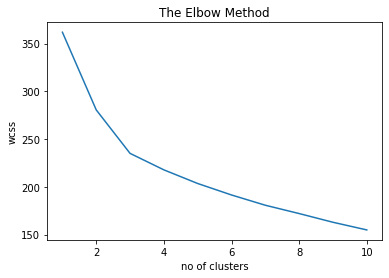

In [57]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [58]:
#y_kmeans= kmeans.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state =seed)
y_kmeans = kmeans.fit_predict(X)

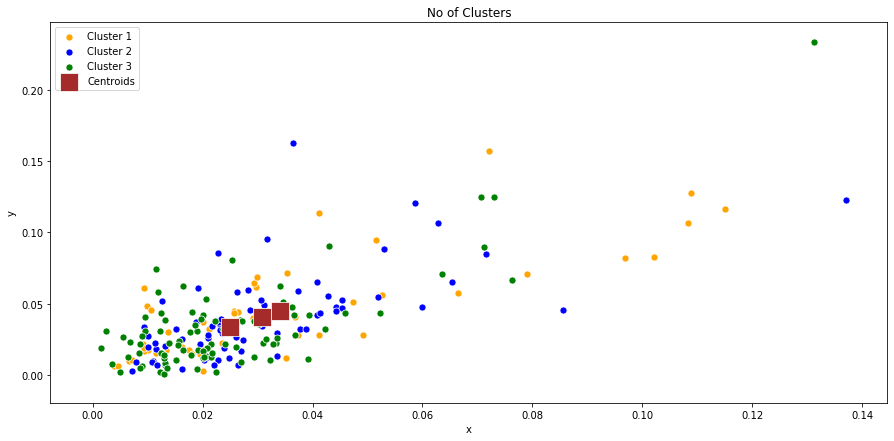

In [59]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'orange', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'brown', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('No of Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Hierarchial Clustering

In [60]:
from sklearn.preprocessing import normalize
datah=data
data_scaled = normalize(datah)
data_scaled = pd.DataFrame(data_scaled, columns=datah.columns)
data_scaled.head()

,C-1,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-9,C-10,...,C-52,C-53,C-54,C-55,C-56,C-57,C-58,C-59,C-60,target
0,0.006409,0.011888,0.013714,0.006633,0.030569,0.031595,0.049314,0.051301,0.099622,0.067643,...,0.000865,0.002083,0.005095,0.002307,0.005351,0.005768,0.002692,0.002884,0.001025,0.320431
1,0.014381,0.016603,0.026762,0.021873,0.037556,0.082000,0.068445,0.110508,0.105937,0.091175,...,0.002667,0.002825,0.001524,0.002984,0.006064,0.004444,0.001556,0.001651,0.001397,0.317462
2,0.007022,0.015600,0.029457,0.029028,0.026107,0.061112,0.065159,0.101076,0.150045,0.166020,...,0.006218,0.004449,0.002546,0.004825,0.006540,0.008470,0.004396,0.002546,0.002091,0.268034
3,0.003322,0.005680,0.020695,0.006810,0.006810,0.012224,0.036473,0.042386,0.019864,0.041987,...,0.004019,0.001196,0.004983,0.002824,0.002425,0.001661,0.001462,0.001329,0.003886,0.332177
4,0.025980,0.022707,0.016399,0.013433,0.020116,0.022127,0.041220,0.084110,0.121511,0.152026,...,0.001057,0.001841,0.003580,0.003750,0.000511,0.002455,0.001637,0.003648,0.003205,0.340941


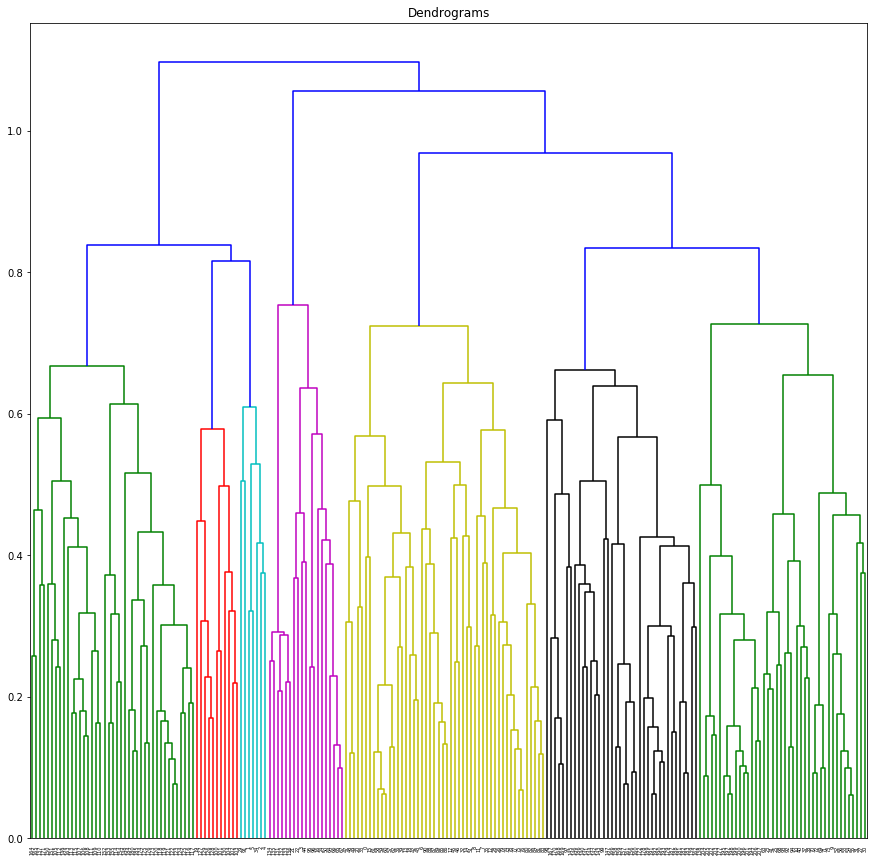

In [61]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

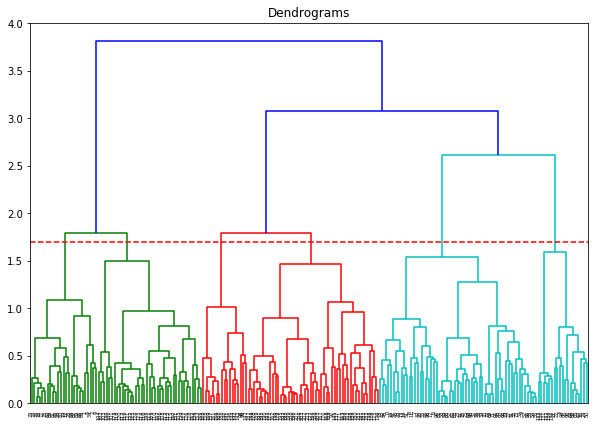

In [62]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.7, color='r', linestyle='--')

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

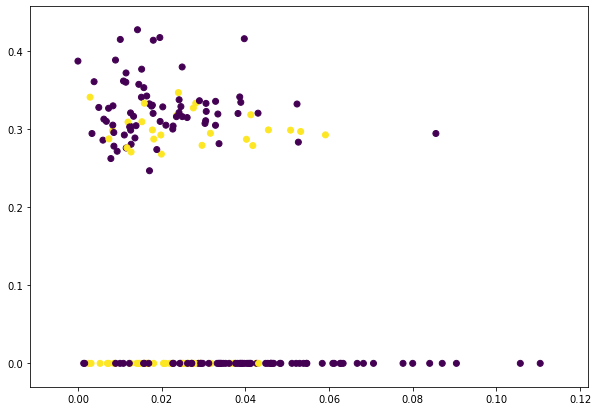

In [64]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['C-48'], data_scaled['target'], c=cluster.labels_)

### Neural Network-Keras

In [85]:
import pandas as pd
import numpy as np

np.random.seed(7)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers


In [86]:
df_features = data.iloc[:, 0:60]
df_label = data.iloc[:, 60]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = seed)

In [88]:

X_train = X_train.astype('float32')
X_cv= X_cv.astype('float32')

X_train /= 255
X_cv /= 255



In [89]:
n_input = 60 # number of features number of columns in dataset
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5=200
num_digits = 2 

In [90]:
Inp = Input(shape=(60,))
x1 = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x2 = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x1)
x3 = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x2)
x4 = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x3)
x5 = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x4)
Dropout(.3)(x5)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x5)

In [91]:
model = Model(Inp, output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 60)                0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               18300     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 402 

In [92]:
learning_rate = 0.01
training_epochs = 40 
batch_size = 100
adam = keras.optimizers.Adam(lr=learning_rate)

In [93]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [94]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Train on 166 samples, validate on 42 samples
Epoch 1/40
 - 0s - loss: 0.6933 - accuracy: 0.4819 - val_loss: 0.6926 - val_accuracy: 0.6429
Epoch 2/40
 - 0s - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6906 - val_accuracy: 0.6429
Epoch 3/40
 - 0s - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6899 - val_accuracy: 0.6429
Epoch 4/40
 - 0s - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6901 - val_accuracy: 0.6429
Epoch 5/40
 - 0s - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6896 - val_accuracy: 0.6429
Epoch 6/40
 - 0s - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6903 - val_accuracy: 0.6429
Epoch 7/40
 - 0s - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6910 - val_accuracy: 0.6429
Epoch 8/40
 - 0s - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6904 - val_accuracy: 0.6429
Epoch 9/40
 - 0s - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6897 - val_accuracy: 0.6429
Epoch 10/40
 - 0s - loss: 0.6929 - accuracy: 0.5060 - val_loss: 0.6894 - val_accuracy: 0.6429
Epoch 11/40
 - 0s - loss

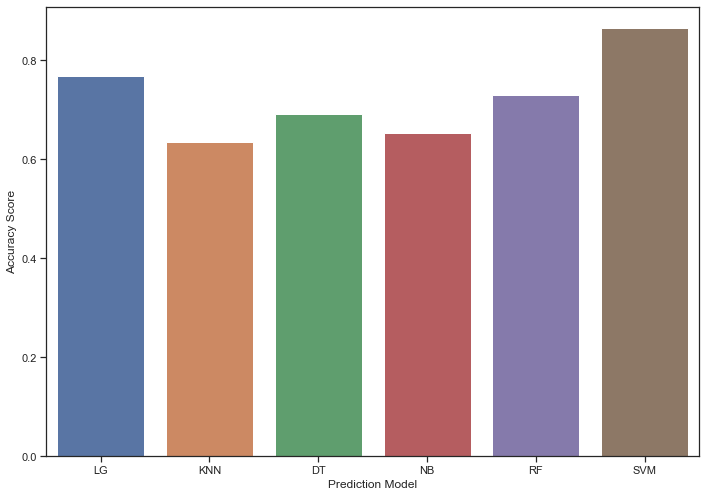

In [120]:
names=['LG','KNN','DT','NB','RF','SVM']
results=[]
results.append(lg_ac)
results.append((accuracy))
results.append((dt_ac))
results.append((nb_ac))
results.append((rf_ac))
results.append((svm_ac))

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(names, results)
g.set(xlabel='Prediction Model', ylabel='Accuracy Score')
sns.set(rc={'figure.figsize':(11.7,8.27)})